# What is Gradient Descent
- 'Gradient' represent the direction/rate of steepest ascent of a function
- It's a vector that points in the direction of the greatest increase of the function at a particular point
- 'descent' implies moving in the direction of decreasing values of the function being optimized.

- Gradient descent is solution to some sort of **optimization problem**.
- what is meant by 'optimization'? - finding the 'best model' for certain situation
- 'best model' means? - "minimizes the error of prediction" or "maximizes the likelihood of the data"

# Idea behind Gradient Descent
- suppose we have a function that takes 2 input vectors and outputs 1 scalar
- Example: sum_of_squares function

In [2]:
from scratch.linear_algebra import Vector, dot

def sum_of_squares(v: Vector) -> float:
    """Computes the sum of squared elements in v"""
    return dot(v,v)

- we need to minimize/maximize such functions
- such as finding the input v that will give largest possible value
- so, gradient gives the input direction where the function most quickly increases i.e. change in o/p wrt to i/p is max

**How can we maximize such function?**

1. <u> Approach 1 </u>

- pick a random start point -> move small step towards increasing gradient (+ve) -> take this new point as start point -> repeat untill reached max value (after this gradient will be -ve)

**To minimize the function** -> move in opposite direction (-ve gradient).

**Problem with this approach?** - If function has multiple minima/maxima, this approach can result in finding wrong one.

# Estimating the Gradient
- Gradient is the 'difference quotient' when step size tends to 0 i.e. $x_2 - x_1 = h$ -> 0 which is also the 'derivative'.

- **Derivative** is the slope of tangent line of curve $(x, f(x))$

- **Difference quotient** is the slope of not-so-tangent line going through $(x+h, f(x+h))$.

- As $h$ -> 0, not-so-tangent line gets closer to tangent line.

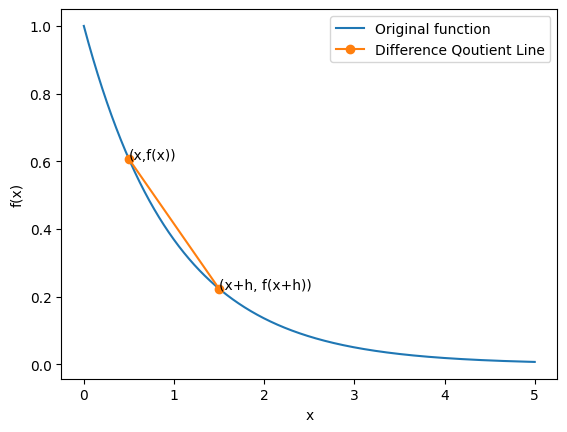

In [3]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)
xs = np.arange(0, 5, 0.00001)
ys = np.exp(-xs)
plt.plot(xs, ys, label='Original function')
plt.ylabel('f(x)')
plt.xlabel('x')

x1 = 0.5
x2 = x1+1
y1 = np.exp(-x1)
y2 = np.exp(-x2)
plt.plot([x1,x2], [y1,y2], label='Difference Qoutient Line', marker='o')
plt.text(x1,y1,('(x,f(x))'))
plt.text(x2,y2,'(x+h, f(x+h))')

plt.legend()
plt.show()

In [4]:
from typing import Callable

def difference_quotient(f: Callable[[float], float], 
                        x: float,
                        h: float) -> float:
    return (f(x+h)-f(x))/h
    

- To find derivatives is easy for some function but not for all.
- Also we can't put limit in python, we need to take very small step size h to get derivative.
- e.g. derivative of square is easy. 
- Let's compare:
  1. Derivative of f(x) = x**2, which is 2*x. 
  2. Estimated DQ with very small step size of 0.001.

In [5]:

# Square function
def square(x: float) -> float:
    return x*x

# Derivative of square function
def derivative(x: float) -> float:
    return 2*x


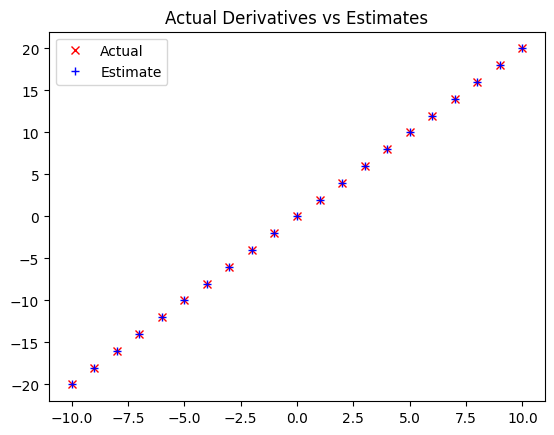

In [6]:
# Plot 
import matplotlib.pyplot as plt

xs = range(-10, 11)
y_actual = [derivative(x) for x in xs]
y_estimated = [difference_quotient(square, x, h=0.001) for x in xs]
plt.title("Actual Derivatives vs Estimates")
plt.plot(xs, y_actual, 'rx', label = "Actual")
plt.plot(xs, y_estimated, 'b+', label = "Estimate")
plt.legend()
plt.show()

- If $f$ is function of many variables, then we calculate partial derivative wrt one varying variable keeping other fixed.

- Let's understand with simple example:
  * We have a function that depends on two variables $x$ and $y$ : $f(x,y) = x^2+y$.
  * We want to find the variation of $f(x,y)$ wrt $x$ while $y$ being constant.
  * **Partial derivative** can be found out using **partial difference quotient** while $h -> 0$.
  * So, if at point $v= (x,y)$ the function is $f(x,y)$ and at $w =(x+h,y)$ the function is $f(x+h,y)$.
  * The partial difference qoutient wrt $x$ becomes: $\frac{f(w)-f(v)}{w-v}$ =  $\frac{f(x+h,y)-f(x,y)}{h}$.


In [9]:
from scratch.linear_algebra import Vector
from typing import List

def partial_difference_quotient(f: Callable[[Vector], float],
                                v: Vector,                    # vector v consists variables (x,y..) of function f
                                                              # it is the point at which to find the difference qoutient
                                i: int,                       # i is index of variable in v wrt which we want to find PD 
                                h: float) -> float:           # step size
    """Returns the i-th partial difference quotient of f at v"""
    # for v_index, v_value in enumerate(v):
    #     if i == v_index:
    #         w = v_value + h
    #     else:
    #         w = v_value
    
    w = [v_value + (h if i == v_index else 0) for v_index, v_value in enumerate(v)]
    return (f(w) - f(v))/ h 
                             
# Estimate gradient

def estimate_gradient(f: Callable[[Vector], float],
                      v: Vector,
                      h: float = 0.0001) -> List[float]:
    return [partial_difference_quotient(f, v, i, h) for i in range(len(v))]  # Returns a list of PD wrt individual variables



In [12]:
# Example for function f = x^2+y

def f(v: Vector) -> float:
    x = v[0]
    y = v[1]
    return x**2+y

# To find gradients at (3,2) wrt x and y
estimate_gradient(f, [3,2], h=0.0001)

[6.000100000012054, 0.9999999999976694]

**NOTE: A major drawback to this “estimate using difference quotients” approach is that it’s computationally expensive.**

- If v has length n, estimate_gradient has to evaluate f on 2n different inputs.
- In everything we do, we’ll have to use math to calculate our gradient functions explicitly.

# Using the Gradient

- Lets find the input of square function that will give minimum output

- Using simple **Gradient Descent Algorithm**

1. **Initial Point:** Start from any random point \((x, y)\).

2. **Calculate Gradient:** At this point, calculate the gradient of \( f(x, y) \). The gradient points in the direction of maximum increase, but since we want to minimize the function, we'll move in the opposite direction.

3. **Move in Negative Gradient Direction:** Take a step in the negative gradient direction to decrease the function's value:
- Adjust \( x \) as \( x = x - 0.01 \times 2x \).
- Adjust \( y \) as \( y = y - 0.01 \times 2y \).

4. **Repeat:** Repeat these steps in each iteration until you reach a minimum point (close to \( (0, 0) \)) or meet the stopping condition.


In [32]:
import random
from scratch.linear_algebra import scalar_multiply, add, distance, Vector

random.seed(0)

# Define gradient of equation : sum of squares, f(x,y) = x^2 + y^2 + z^2.
def sum_of_square_gradient(v: Vector) -> Vector:
    return [2*i for i in v]

# Define new gradient step towards optimal value
def gradient_step(v: Vector, gradient: Vector, step_size: float) ->  Vector:  # Returns new v-value reaching towards optimal value
                                                                              # We input gradient of (wrt each coefficient) 
                                                                              # position vector v which is to be minimized
                                                                              # step_size is different from 'h' used above
                                                                              # step_size is the increment parameter of 
                                                                              # gradient descent algorithm to move towards optimal solution.
    assert len(v) == len(gradient)  # Check if gradient for each v element is present
    increment = scalar_multiply(gradient, step_size)
    return add(v, increment)

In [33]:
# gradient_step([2,3],[5, 7], -0.001)   #[1.995, 2.993]
    
# Let's take gradient_step towards minimal value of f(x,y) through 1000 iterations
# Take random starting point v = [x,y]

random.seed(1)

v = [random.uniform(-10,10) for _ in range(2)]
print(f"{v=}")

for epoch in range(1000):
    gradient = sum_of_square_gradient(v)
    v = gradient_step(v, gradient, -0.01)   # -ve step_size indicates moving towards minima
    d = distance(v, [0,0])

    if epoch % 100 == 0:
        print(f"{epoch=} {v=} {d=}") 

print (f"{epoch=}, {v=}, {d=}")

# the position vector v is very close to 0. means x=y=z=0 will give minimum value of f(x)

v=[-7.312715117751976, 6.9486747387446535]
epoch=0 v=[-7.1664608153969365, 6.80970124396976] d=9.885858164607816
epoch=100 v=[-0.9504128506750917, 0.9030995547512182] d=1.311058119428808
epoch=200 v=[-0.12604333017319713, 0.11976866187985598] d=0.17387194555085891
epoch=300 v=[-0.016715810471065157, 0.015883666748615362] d=0.023058820201511628
epoch=400 v=[-0.002216843361093526, 0.0021064848301816275] d=0.003058050494581436
epoch=500 v=[-0.0002939967820364554, 0.00027936108267772214] d=0.00040555729849512035
epoch=600 v=[-3.898972266816128e-05, 3.7048742718996956e-05] d=5.378482881629874e-05
epoch=700 v=[-5.170799704711141e-06, 4.913387805852343e-06] d=7.13292011149286e-06
epoch=800 v=[-6.857491604595124e-07, 6.51611308750834e-07] d=9.459646974189369e-07
epoch=900 v=[-9.09437491153404e-08, 8.641640238253449e-08] d=1.25453418063814e-07
epoch=999, v=[-1.2307060835796225e-08, 1.1694392761218383e-08], d=1.6977118968471245e-08


# Choosing the right step size
- It's an art
- Popular methods are:
    1. Using fixed step size -- **mostly used** -- but if too small, the simulation will go on forever. -- too large, will skip the minima/maxima.
    2. Gradually shrinking step size over time.
    3. At each step, choosing the step size that minimizes the value of the objective function -- **great but costly**

- Thus we need to experiment.

# Using Gradient Descent Algorithm to fit models
- We will have a dataset.

- We will have a hypothesised equation/model to fit the data of dataset.

- We will find a **loss function/cost function**, which is the average of squared difference between predicted values of model and real dataset values (i.e. MSE or error^2)

- We will apply gradient descent to minimize the loss function and update parameters of our hypothesised model.


- We want to fit the data in a linear regression model  
  `y = slope * x + intercept`

- **we need to optimize (slope, intercept) with a random strating value theta = (slope, intercept)**  

- Define error:
  `error = predicted - actual`

- Define a squared error Loss function: Why, we will see in Linear regression Chapter.
  `loss = error**2`

- What is predicted one?  
  `predicted = slope * x + intercept`

- Find gradient of loss   
  `grad = 2*(error)* (d(error)/d(slope)), 2*(error)* (d(error)/d(intercept))`  
  `grad = 2*error*x , 2*error`

- Follow the gradient descent algorithm to minimize Loss function.
  

In [38]:
# Given actual data
inputs = [(x, 20*x +5) for x in range(-50, 50)]
print(f"{inputs[:5]=}")

# Start with random slope and intercept values

random.seed(10)

theta = [random.uniform(-5,5), random.uniform(-5,5)]
print(f"{theta=}")
slope_history = []
intercept_history = []
f_history = []
# Def gradient of loss function
def linear_gradient(x: float, y: float, theta: Vector) -> Vector:  # theta is initial point vector
    slope, intercept = theta   # Update slope and intercept for updated theta
    predicted = slope * x + intercept
    error = predicted - y
    return [2 * error * x, 2 * error]

# Do iterations
from scratch.linear_algebra import vector_mean
for epoch in range(5000):
    grad = vector_mean([linear_gradient(x,y,theta) for x, y in inputs])  #mean of [slope, intercept] for each x,y
    theta = gradient_step(theta, grad, -0.001)    #update theta with gradient_step
print(f"{epoch=}, {theta=}")  

inputs[:5]=[(-50, -995), (-49, -975), (-48, -955), (-47, -935), (-46, -915)]
theta=[0.7140259468991346, -0.711109453248854]
epoch=4999, theta=[19.999999845047313, 4.999742003686842]


# Minibatch and Stochastic GD
 **Minibatch Gradient descent**

 - One drawback of above approach is that we had to evaluate the gradients on the entire dataset before we could take a gradient step and update our parameters.
 
 - In this case it was fine, because our dataset was small with only 100 pairs and the gradient computation was cheap.
 
 - But practiaclly, our models will frequently have large datasets and expensive gradient computations.
 
 - <u> In that case we’ll want to take gradient steps more often.</u>
 
 - We can do this using a technique called **minibatch gradient descent**, in which we compute the gradient (and take a gradient step) based on a “minibatch” sampled from the larger dataset.
 

In [40]:
from typing import TypeVar, List, Iterator

T = TypeVar('T')  # Allows to type generic functions

def minibatches(dataset: List[T],  
                batch_size: int,                             
                shuffle: bool = True) -> Iterator[List[T]]:  # Iterator type can be iterated using loops 
    """
    Generates "batch_size" sized minibatches from the dataset
    """
    batch_starts = [start for start in range(0, len(dataset), batch_size)]
    
    if shuffle: random.shuffle(batch_starts)

    for start in batch_starts:
        end = start+batch_size
        yield dataset[start:end]


In [42]:
dataset = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for mini in minibatches(dataset, 2, shuffle = True):
    print(mini)

[3, 4]
[1, 2]
[9, 10]
[5, 6]
[7, 8]


In [53]:
# Solve problem using minibateches
random.seed(1)

# Starting point 
theta = [random.uniform(-1,1), random.uniform(-1,1)]
print(f"{theta=}")

# Iterate
for epoch in range (1000):
    for batch in minibatches(inputs, batch_size=20):
        # print(f"{batch=}")
        grad = vector_mean([linear_gradient(x,y, theta) for x, y in batch])  # Gradient for each batch
        theta = gradient_step(theta, grad, -0.001)  # Update theta with calculated gradient and learning rate 

slope, intercept = theta 
print(f"{slope=}, {intercept=}")

theta=[-0.7312715117751976, 0.6948674738744653]
slope=19.999999680361427, intercept=4.999997968208065


- Another variation is **stochastic gradient descent**, in which we take gradient steps **based on one training example at a time**:

In [55]:
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

for epoch in range(100):
    for x, y in inputs:
        grad = linear_gradient(x, y, theta)
        theta = gradient_step(theta, grad, -0.001)

slope, intercept = theta

assert 19.9 < slope < 20.1, "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

- On this problem, stochastic gradient descent finds the optimal parameters in a much smaller number of epochs.

- But there are always tradeoffs.

- Basing gradient steps on small minibatches (or on single data points) allows us to take more of them, but the gradient for a single point might lie in a very different direction from the gradient for the dataset as a whole.

- Also, if we vectorize the points based on minibatches, we will get performance gains.


**The terminology for the various flavors of gradient descent is not uniform :**

  - The “compute the gradient for the whole dataset” approach is often called **batch gradient descent**,
  
  - and some people say **stochastic gradient descent** when referring to the **minibatch version** (of which the one-point-at-a-time version is a special case).**